<a href="https://colab.research.google.com/github/TietNguyenHoangTanDat/AI-SangT5/blob/main/HW4_Hoa_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Khai báo thư viện
import keras
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from keras.models import Sequential
from keras.models import load_model
from keras.utils import load_img
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras.utils.image_utils import img_to_array
#Tạo biến để lưu đường dẫn drive gồm có đường dẫn để train và đường dẫn test
folder_train = "drive/MyDrive/Hoa_Train"
folder_test = "drive/MyDrive/Hoa_Test"

#Tạo dữ liệu đầu vào cho huấn luyện mạng neural
data_train = ImageDataGenerator(rescale=1/255, rotation_range=0.2, horizontal_flip=True, vertical_flip=True, zoom_range=0.2)
data_test = ImageDataGenerator(rescale=1/255)

#Tạo 2 biến để đưa vào mô hình neural
train_set = data_train.flow_from_directory(folder_train, target_size=(128, 128), batch_size=20, class_mode='categorical')
test_set = data_test.flow_from_directory(folder_test, target_size=(128, 128), batch_size=20, class_mode='categorical')

#Thông tin mô keyvalue của mô hình
train_set.class_indices
test_set.class_indices


Found 160 images belonging to 5 classes.
Found 30 images belonging to 5 classes.


{'HoaCamTuCau': 0, 'HoaDao': 1, 'HoaHong': 2, 'HoaMai': 3, 'HoaTulip': 4}

In [ ]:
flower = {0:'HoaCamTuCau', 1: 'HoaDao', 2: 'HoaHong', 3: 'HoaMai', 4: 'HoaTulip'}

In [ ]:
#Tiến hành train mô hình với việc xữ lý dữ liệu hình ảnh (CNN)
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization
from keras.models import Sequential,Model
from keras.layers import LeakyReLU
from keras.optimizers import Adam


model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape=(128,128,3),padding = 'same'))                                                          
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(256,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))


#ANN
model.add(Flatten())   # flatten làm phẳng ảnh
model.add(Dense(256,activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(5,activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                  

In [ ]:
#Tiến hành phân tích và train với dữ liệu đã tạo mạng ở trên (ANN) và kiểm tra độ chính xác và độ mất mát
model.compile(loss ='categorical_crossentropy', optimizer='Adam',  metrics = ['accuracy'])   # Adam tốc độ học 0.1
train = model.fit(train_set, epochs = 20, batch_size = 256,verbose= 1)
test_loss,test_acc = model.evaluate(train_set)
print('độ chính xác trên tập kiểm tra', test_acc)
print('hàm mất mát trên tập kiểm ta', test_loss)

Epoch 1/20
8/8 [==============================] - 42s 4s/step - loss: 1.4936 - accuracy: 0.3812
Epoch 2/20
8/8 [==============================] - 11s 1s/step - loss: 1.0998 - accuracy: 0.5312
Epoch 3/20
8/8 [==============================] - 12s 2s/step - loss: 1.3317 - accuracy: 0.5250
Epoch 4/20
8/8 [==============================] - 11s 1s/step - loss: 1.0622 - accuracy: 0.5375
Epoch 5/20
8/8 [==============================] - 14s 2s/step - loss: 0.9737 - accuracy: 0.6125
Epoch 6/20
8/8 [==============================] - 12s 1s/step - loss: 0.7916 - accuracy: 0.7437
Epoch 7/20
8/8 [==============================] - 12s 2s/step - loss: 0.8571 - accuracy: 0.6687
Epoch 8/20
8/8 [==============================] - 12s 1s/step - loss: 0.7783 - accuracy: 0.6625
Epoch 9/20
8/8 [==============================] - 12s 1s/step - loss: 0.8149 - accuracy: 0.6875
Epoch 10/20
8/8 [==============================] - 12s 2s/step - loss: 0.6736 - accuracy: 0.7250
Epoch 11/20
8/8 [======================

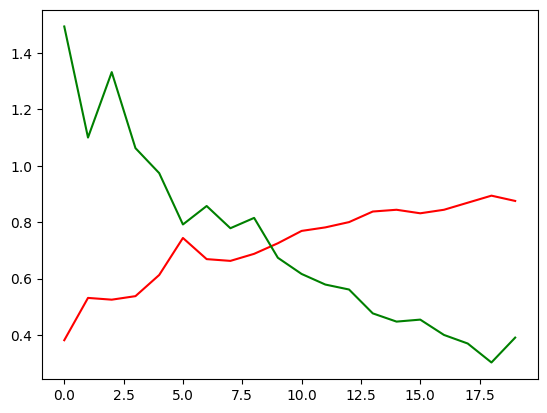

In [ ]:
#Tiến hành vẽ đồ thị biểu diễn độ chính và độ mất mát
import matplotlib.pyplot as plt      
accuracy = train.history['accuracy']
loss = train.history['loss']                                                   
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r',label = 'Training accuracy')
plt.plot(epochs,loss,'g',label = 'Training loss')
plt.show()

1/1 [==============================] - 0s 163ms/step
Predicted:  HoaMai


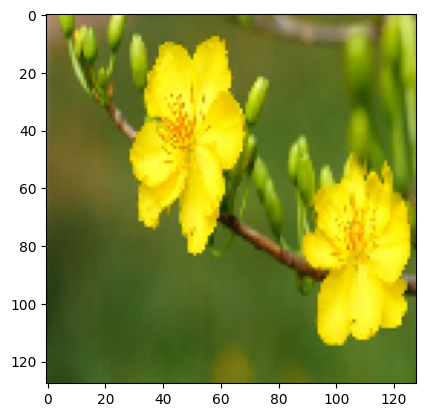

In [ ]:
#Tiến hành kiểm tra lại mô hình bằng hình ảnh trong folder test
filePath = "drive/MyDrive/Hoa_Test/HoaMai/2.jpg"
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", flower[pred_value])
plt.imshow(testImage)

1/1 [==============================] - 0s 176ms/step
Predicted:  HoaDao


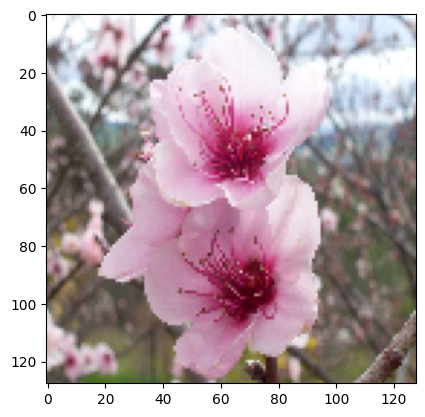

In [ ]:
#Tiến hành kiểm tra lại mô hình bằng hình ảnh trong folder test
filePath = "drive/MyDrive/Hoa_Test/HoaDao/2.jpg"
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", flower[pred_value])
plt.imshow(testImage)

1/1 [==============================] - 0s 39ms/step
Predicted:  HoaTulip


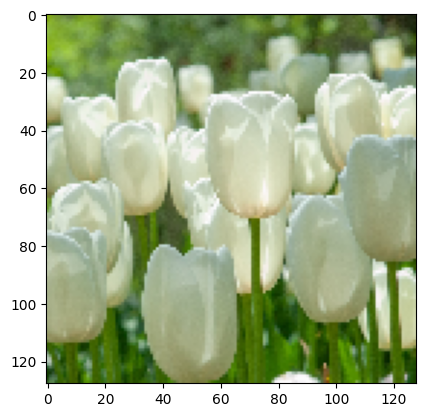

In [ ]:
#Tiến hành kiểm tra lại mô hình bằng hình ảnh trong folder test
filePath = "drive/MyDrive/Hoa_Test/HoaTulip/3.jpg"
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", flower[pred_value])
plt.imshow(testImage)